In [1]:
#Imports
import sys
sys.path.append("../")
import numpy
import matplotlib
from classes import ModelWrapper, DataLoader, Cluster, Plotting

#Interactive matplotlib plots
%matplotlib widget

2024-03-01 12:03:12.443081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Initialisation
modelAPI = ModelWrapper.loadPostprocessed("../models/3D/TPC_denoiser", "TPC_denoiser")
track_type = "alltracks"
data_loader = DataLoader("../data")
noisy = data_loader.getBatch(True, True, track_type=track_type, normalising=True)
noisy_with_E = data_loader.getBatch(True, True, track_type=track_type, normalising=False)
clean = data_loader.getBatch(True,False, track_type=track_type)
classified = modelAPI.classify( modelAPI.evaluateBatch(noisy) )
good_NN = Cluster.getGoodFromDataset(classified, noisy_with_E)
names = data_loader.getX17Names(track_type)

2024-03-01 12:03:17.923598: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


21/21 [==============================] - 6s 271ms/step


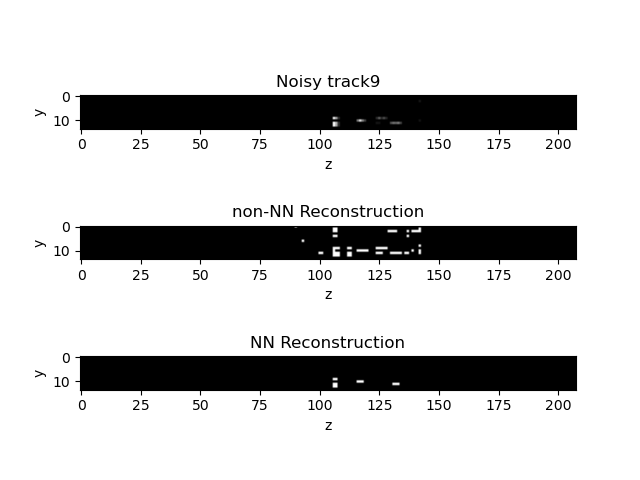

In [3]:
#View projected comparison specified by name
event_name = "track9"
axis = 0
event_noise = data_loader.getEventFromName(event_name, noisy=False, normalising=True)
event_nonNN = data_loader.getEventFromName(event_name, noisy=True)
event_NN = modelAPI.classify(event_noise)
Plotting.getPlotEventOneAxis(event_noise, numpy.where(event_nonNN>0,1,0), event_NN, axis, event_name)


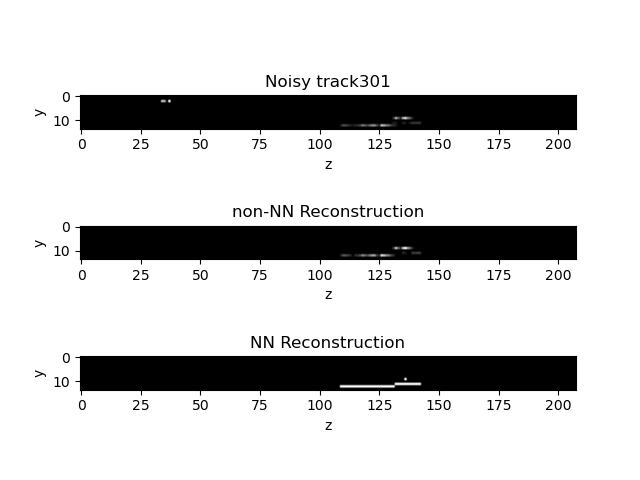

In [9]:
#View random projected comparison
axis = 0
index = numpy.random.randint(0, noisy.shape[0])
Plotting.getPlotEventOneAxis(noisy[index], clean[index], numpy.where(classified[index]>0,1,0), axis, names[index])

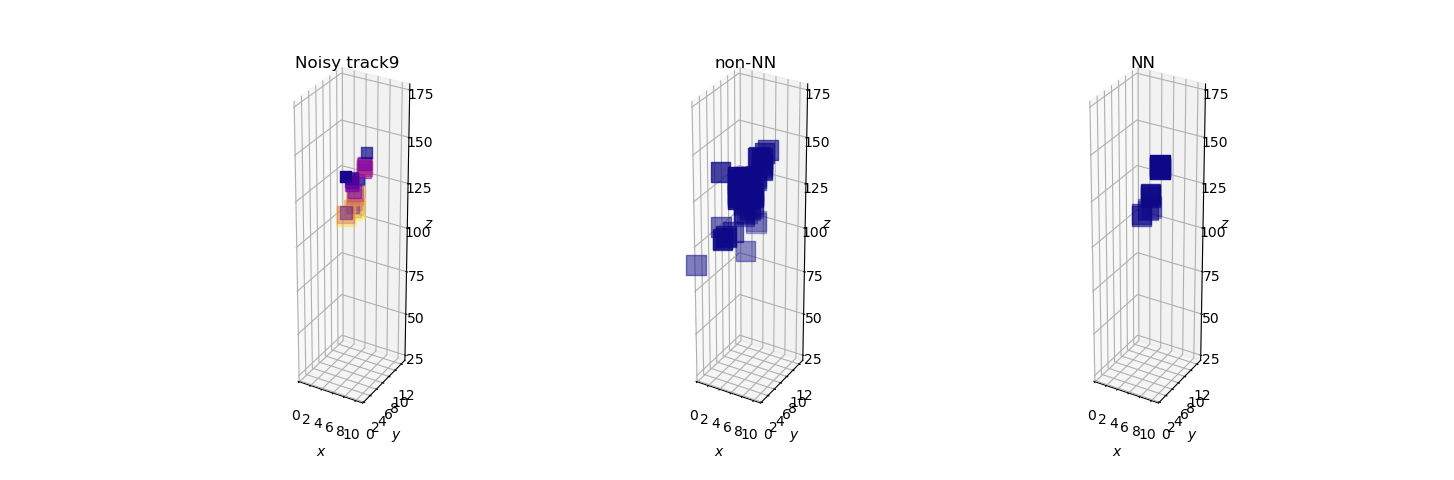

In [5]:
#View 3D comparison specified by name
event_name = "track9"
axis = 0
event_noise = data_loader.getEventFromName(event_name, noisy=False, normalising=True)
event_nonNN = data_loader.getEventFromName(event_name, noisy=True)
event_NN = modelAPI.classify(event_noise)

fig = matplotlib.pyplot.figure(figsize=matplotlib.pyplot.figaspect(0.33))
axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in [0,1,2]]
Plotting.plot3DToAxis(event_noise, axes[0], "Noisy " + event_name, z_cut=(25,175))
Plotting.plot3DToAxis(numpy.where(event_nonNN>0,1,0), axes[1], "non-NN", z_cut=(25,175))
Plotting.plot3DToAxis(event_NN, axes[2], "NN", z_cut=(25,175))

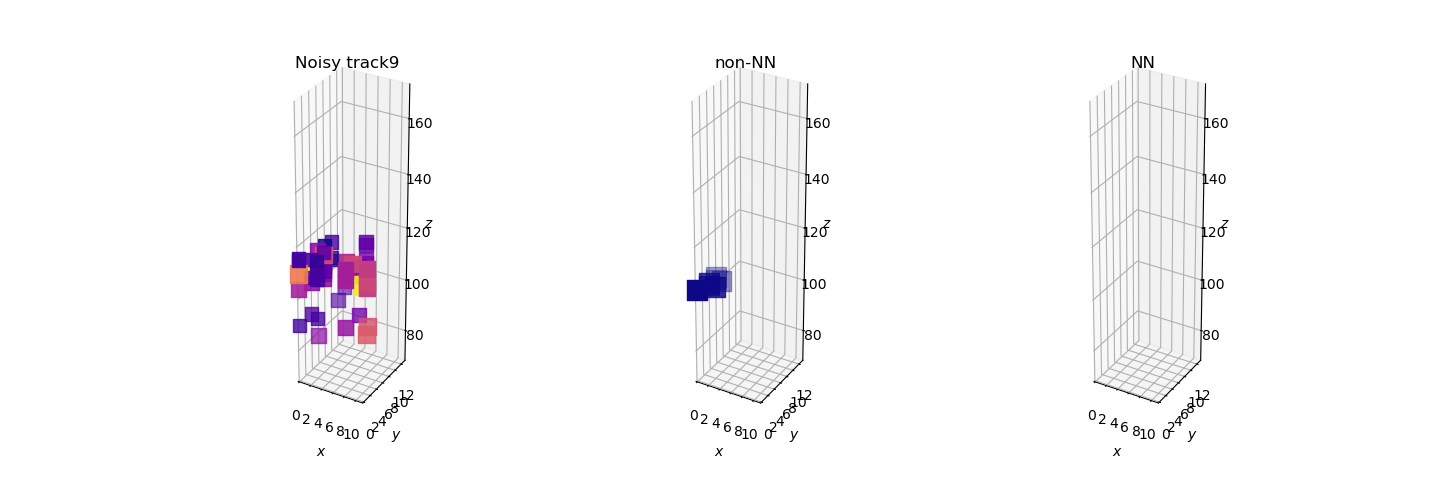

In [6]:
#View random 3D comparison
event_name = "track9"
index = numpy.random.randint(0, noisy.shape[0])

fig = matplotlib.pyplot.figure(figsize=matplotlib.pyplot.figaspect(0.33))
axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in [0,1,2]]
Plotting.plot3DToAxis(noisy[index], axes[0], "Noisy " + event_name, z_cut=(70,170))
Plotting.plot3DToAxis(numpy.where(clean[index]>0,1,0), axes[1], "non-NN", z_cut=(70,170))
Plotting.plot3DToAxis(classified[index], axes[2], "NN", z_cut=(70,170))

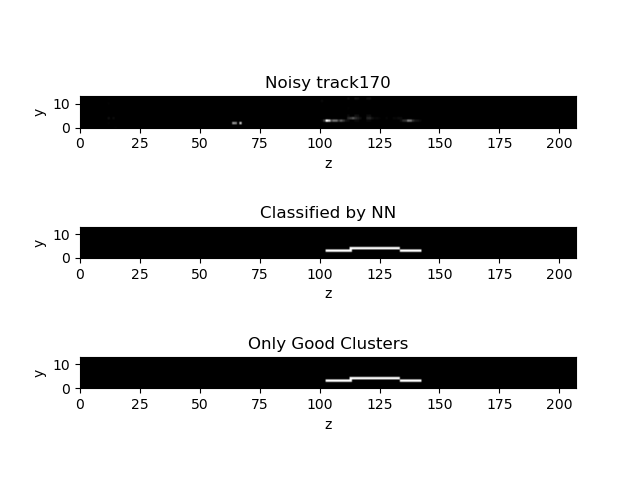

In [7]:
#View random projected NN classification with good flag included
axis = 0
index = numpy.random.randint(0, noisy.shape[0])

x_labels = ['z', 'z', 'y']
y_labels = ['y', 'x', 'x']
axis_ranges = {'x': 11, 'y': 13, 'z': 207}

fig, ax = matplotlib.pyplot.subplots(3)
ax[0].imshow(numpy.sum(noisy[index], axis), "gray")
ax[0].set_title("Noisy " + names[index])
ax[1].imshow(numpy.sum(classified[index], axis), "gray")
ax[1].set_title("Classified by NN")
ax[2].imshow(numpy.sum(good_NN[index], axis), "gray")
ax[2].set_title("Only Good Clusters")
for i in range(3):
	ax[i].set_xlabel(x_labels[axis])
	ax[i].set_xlim(0, axis_ranges[x_labels[axis]])
	ax[i].set_ylabel(y_labels[axis])
	ax[i].set_ylim(0, axis_ranges[y_labels[axis]])
matplotlib.pyplot.show()


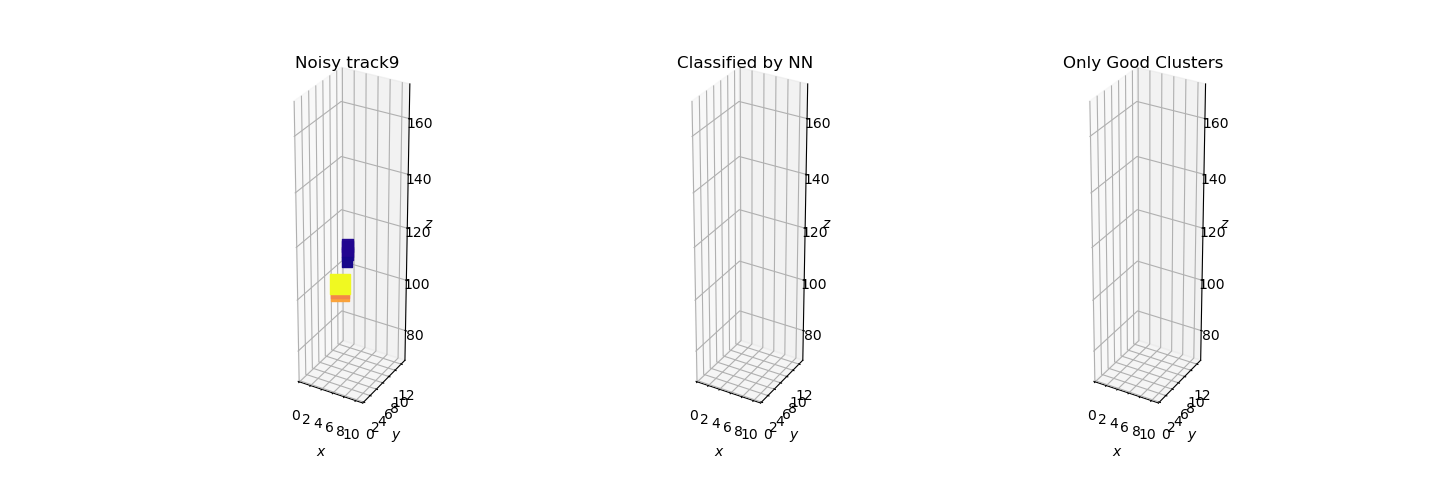

In [8]:
#View random projected NN classification with good flag included
index = numpy.random.randint(0, noisy.shape[0])

fig = matplotlib.pyplot.figure(figsize=matplotlib.pyplot.figaspect(0.33))
axes = [fig.add_subplot(1, 3, k+1, projection='3d') for k in [0,1,2]]
Plotting.plot3DToAxis(noisy[index], axes[0], "Noisy " + event_name, z_cut=(70,170))
Plotting.plot3DToAxis(classified[index], axes[1], "Classified by NN", z_cut=(70,170))
Plotting.plot3DToAxis(good_NN[index], axes[2], "Only Good Clusters", z_cut=(70,170))